# إذا كنت ترغب التطبيق مباشرةً على الإنترنت : النسخة موجودة [هنا](https://www.kaggle.com/code/ninamaamary/linear-regression-arabic)

<div dir="rtl">
<h1>الاستيرادات</h1>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("whitegrid") 

<div style="background-color:black; " align="center">
<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExeHN0Ym50OW92ZXp6cjljdjAxNDM2eW9ha2JyaDAzcHp1M285M2RzYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/cNFFHJ5Ki8KBJbS2Lt/giphy.gif" alt="gif" width="200" height="200">
</div>

<div dir="rtl">
<h1>الانحدار الخطي (Linear Regression)</h1>
هو خوارزمية تعليم مُشرف تستخدم معادلة الخط المستقيم للتنبؤ بمُخرَج ذو قيمة حقيقية <strong>(real-valued output)</strong>. تربط بين المتغير التابع (<strong>y</strong>) والمتغيرات المستقلة (<strong>x</strong>). في هذا القسم سنتعامل مع مجموعة البيانات <code>housesalesprediction</code>. توجد نوعان من الانحدار الخطي:

<ul>
  <li>الانحدار الخطي أحادي المتغير (Univariate Linear Regression)</li>
  <li>الانحدار الخطي متعدد المتغيرات (Multivariate Linear Regression)</li>
</ul>

<div style="background-color: black;" align="center">
<img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXBlNTVwZWtiZHJrOGdiOGRubTR1eWh0ZnR3dDhteGp4Mmlmbnh2eSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Mc1yxvp8fIGuYXHJI0/giphy.gif" alt="gif" width="200" height="200"></div>

<h2>1️⃣ الانحدار الخطي أحادي المتغير (Univariate Linear Regression)</h2>
هو انحدار خطي بسيط مع متغير تابع واحد (<strong>y</strong>) ومتغير مستقل واحد (<strong>x</strong>). في مجموعة بيانات <code>housesalesprediction</code> سنستخدم خاصية <em>living area (sqft)</em> لتوقّع سعر المنزل ☺️. يقوم النموذج بتقدير الميل والمقطع للخط: <span class="math">\(\hat{y} = \theta_0 + \theta_1 x\)</span>
<ul>
  <li>الميل (slope) يمثل التغير في <strong>y</strong> لكل وحدة تغير في <strong>x</strong>.</li>
  <li>المقطع (intercept) يمثل القيمة المتوقعة لـ <strong>y</strong> عندما تكون <strong>x</strong> = 0.</li>
  <li>كل من \(\theta_0 , \theta_1\) قيم مجهولة يُقدّرها النموذج.</li>
</ul>
الدالة <span class="math">\( \hat{y} = \theta_0 + \theta_1 x \)</span> مع قيم فعلية لـ \(\theta_0 , \theta_1\) هي ناتج خوارزمية التعلم (في حالتنا Univariate LR). نُسمّيها دالة الفرضية (hypothesis): <span class="math">\(h_{\theta}(x) = \theta_0 + \theta_1 x\)</span> — وهي الدالة اللي "تعلمها" النموذج.
</div>

<AxesSubplot:xlabel='sqft_living', ylabel='price ($1000)'>

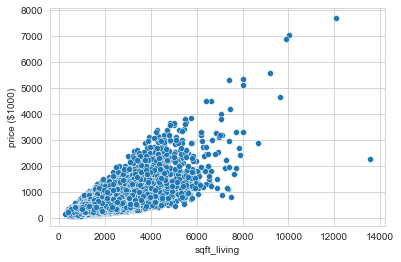

In [2]:
HOUSE_PATH = os.path.join("..", "..", "datasets", "housing", "kc_house_data.csv")

houses = pd.read_csv(HOUSE_PATH)
houses['price ($1000)'] = houses['price']*1/1000 
sns.scatterplot(data=houses,  x="sqft_living", y="price ($1000)")

<div dir="rtl">
يمكننا استخدام <code>seaborn.regplot</code> لرسم خط الانحدار الأفضل، وسترى كيف يوضح الرسم العلاقة الخطية بين مساحة السكن والسعر.
</div>


<AxesSubplot:xlabel='sqft_living', ylabel='price ($1000)'>

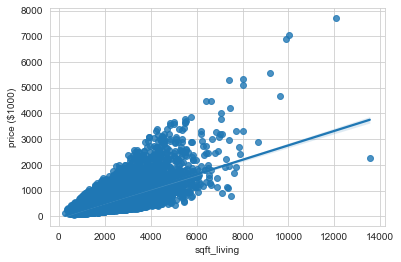

In [3]:
sns.regplot(data=houses, x="sqft_living", y="price ($1000)")

<div dir="rtl">
<h2>♾️ الانحدار الخطي متعدد المتغيرات (Multivariate Linear Regression)</h2>
يفهم العلاقة بين متغير تابع واحد (<strong>y</strong>) وعدة متغيرات مستقلة (<strong>\(x_0,x_1,\dots\)</strong>). في مجموعة بيانات <code>housesalesprediction</code> سنستخدم عدة خصائص مثل <em>living area (sqft), sqft_living15</em> وغيرها لتوقّع السعر ☺️. دالة الفرضية تصبح:
$$ h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$
</div>

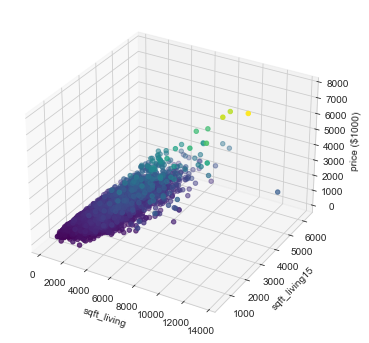

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(houses['sqft_living'], houses['sqft_living15'],houses['price ($1000)'], c=houses['price ($1000)'], cmap='viridis', marker='o')
ax.set_xlabel('sqft_living')
ax.set_ylabel('sqft_living15')
ax.set_zlabel('price ($1000)')
plt.show()

<div dir="rtl">
<h3>كيف يتعلّم النموذج؟</h3>
هدف الانحدار الخطي هو إيجاد أفضل قيم لـ \(\theta_0, \theta_1, \dots, \theta_n\) بحيث يكون الخطأ بين القيمة المتوقعة \(\hat{y}\) والقيمة الفعلية \(y\) أصغر ما يمكن. نعني بذلك تقريبًا أن نبحث عن خط يملك أصغر مجموع للبواقي (Residual Sum).

<p class="center"><img src="https://i.imgur.com/wAX33HH.jpeg" alt="residuals" width="400" height="400"></p>

<h4>📉 دالة التكلفة (Cost Function)</h4>
تُعرف أيضاً باسم Loss أو Objective أو Error Function. تساعد دالة التكلفة النموذج على "فهم" مدى بعد التنبؤ عن القيمة الحقيقية. بما أن قيم \(\theta\) تؤثر على الناتج، فإن دالة التكلفة تُخبرنا: ما مدى جودة هذه القيم؟

<h5>🎢 متوسط مربع الخطأ (Mean Squared Error - MSE)</h5>
MSE هو متوسط مربع الفرق بين القيمة المتوقعة \(\hat{y}\) والقيمة الفعلية \(y\)، حيث \(m\) هو عدد نقاط البيانات:

$$MSE = \frac{1}{m} \sum\limits_{i=1}^{m} (y^i - \hat{y}^i)^2 $$

<h4>🗻 خوارزمية الانحدار التدرّجي (Gradient Descent Algorithm GDA)</h4>
هي خوارزمية تحسين (optimization) تجد أفضل خط اعتمادًا على دالة التكلفة 😊 — باختصار، تبحث عن الحل الأمثل. GDA هي خوارزمية تكرارية تحدّث معاملات \(\theta_i\) بحيث تقل قيمة الدالة على مجموعة البيانات كلها.رسم دالة التكلفة يشبه وعاءًا محدّبًا وله قاع واحد (global optimum).
</div>

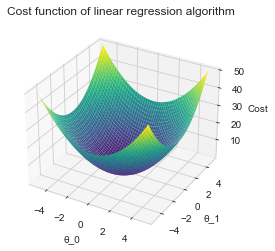

In [5]:
X = np.linspace(-5, 5)
Y = np.linspace(-5, 5)
X_grid, Y_grid = np.meshgrid(X, Y)


Z = X_grid**2 + Y_grid**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('θ_0')
ax.set_ylabel('θ_1')
ax.set_zlabel('Cost')
ax.set_title('Cost function of linear regression algorithm')
plt.show()

<div dir="rtl">
 تقوم GDA بحساب اتجاه أكبر انحدار ثم تخطو خطوة صغيرة إلى أسفل، وتكرر هذا الأمر حتى تصل إلى القاع. نقوم بذلك عن طريق أخذ المشتقة (الميل اللحظي). عند اشتقاق MSE يظهر لدينا عامل 2 في المقام لذا راح نضيف قسمة على 2 لتسهيل الأشتقاق، نستخدم الشكل:
$$ J(\theta_0, \theta_1, ..., \theta_n) = \frac{1}{2m} \sum\limits_{i=1}^{m} (y^i - \hat{y}^i)^2 $$
والتحديث التكراري للمعامل \(\theta_j\) يكون كالتالي:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1, ..., \theta_n)$$
$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (y^i - \hat{y}^i)\cdot x^{i}_j$$
حيث <strong>:=</strong> يعني التخصيص، و<strong>\(\alpha\)</strong> هو معدل التعلم (learning rate) — طول الخطوات اللي نأخذها للوصول للأسفل — وهو قيمة موجبة دائمًا. مشتقة دالة التكلفة تعطينا اتجاه الانحدار الأكبر (الاتجاه اللي نتحرك فيه لننقص التكلفة).
<h5>المشتقة — ماذا تعني؟</h5>
<ul>
  <li>المشتقة الموجبة تعني أن الميل يزيد، لذا نحتاج إلى تقليل \(\theta_1\) — *نذهب باتجاه القيم السالبة*.</li>
  <li>المشتقة السالبة تعني أن الميل يتناقص، لذا نحتاج إلى زيادة \(\theta_1\) — *نذهب باتجاه القيم الموجبة*.</li>
</ul>
<p class="center"><img src="https://i.imgur.com/EoanTVB.jpeg" alt="gradient descent" width="500" height="500"></p>
<h5>معدل التعلم (Learning Rate)</h5>
الـ <strong>\(\alpha\)</strong> يحدد سرعة تقارب الخوارزمية:
<ul>
  <li>لو كان <strong>\(\alpha\)</strong> صغير جدًا → GDA سيتقارب ببطء شديد.</li>
  <li>لو كان <strong>\(\alpha\)</strong> كبير جدًا → قد نتخطى القاع ولا يتقارب أبدًا.</li>
</ul>
خوارزمية GDA في الحالة أحادية المتغير تبدو هكذا:
$$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (y^i - \hat{y}^i)$$
$$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (y^i - \hat{y}^i)\cdot x^i$$
</div>

<div dir="rtl">
<h3>🧐 التحيز الاستقرائي (Inductive Bias)</h3>
هو مجموعة الافتراضات اللي يعتمد عليها النموذج لتوقّع الناتج. في الانحدار الخطي نفترض أمرين أساسيين:
<ul>
  <li>هناك علاقة خطية بين المتغيرات المستقلة والتابعة.</li>
  <li>المشاهدات (observations) يجب أن تكون مستقلة عن بعضها.</li>
</ul>
<h3>🎭 المزايا والعيوب</h3>
<div class="alert alert-block alert-info">
  <b>المزايا:</b>
  <ul>
    <li>بسيط وسهل الفهم</li>
    <li>تعقيده منخفض</li>
    <li>يعمل جيدًا مع العلاقات الخطية</li>
  </ul>
</div>
<div class="alert alert-block alert-danger">
  <b>العيوب:</b>
  <ul>
    <li>حساس للقيم الشاذة والميزات غير المهمة</li>
    <li>يفترض خطية العلاقة</li>
    <li>قد يكون مبسّطًا جدًا في بعض الحالات</li>
  </ul>
</div>
<h3>〰️ الانحدار متعدد الحدود (Polynomial Regression)</h3>
يتبع نفس منطق الانحدار الخطي لكن بدلًا من ملاءمة خط أو hyperplane نملاءم دالة غير خطية أكثر تعقيدًا.
</div>

<AxesSubplot:xlabel='sqft_living', ylabel='price ($1000)'>

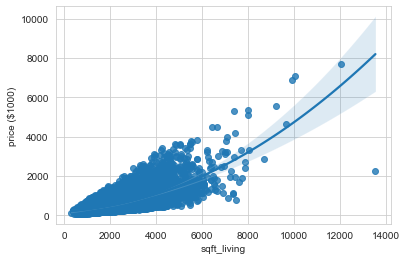

In [6]:
 sns.regplot(data=houses, x="sqft_living", y="price ($1000)", order=2)

<div dir="rtl">
<h3>💻 التطبيق العملي</h3>
سنستخدم فئة <code>sklearn.linear_model.LinearRegression</code> على مجموعة البيانات <code>housesalesprediction</code>.
</div>

In [7]:
# الخطوة 1: اختر الميزات وحوّلها إلى numpy
X = houses[['sqft_living', 'sqft_living15']].to_numpy()
y = houses['price'].to_numpy()

In [8]:
# الخطوة 2: قسّم مجموعة البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# الخطوة 3: تدريب نموذج الانحدار الخطي الخاص بنا
from sklearn.linear_model import LinearRegression 

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [10]:
# الخطوة 4: مرحلة الاختبار
from sklearn.metrics import mean_squared_error

pred = linearRegression.predict(X_test)
print(f'MSE: {np.sqrt(mean_squared_error(y_test, pred))}')

MSE: 291358.74581038696
